## Vancouver Şehrinde 2003-2017 Yılları Arasında İşlenmiş Suçların Analizi Ve Tahmini

kaggle.com üzerinden elde edilmiş 2003-2017 yılları arasında Vancouver şehrinde işlenmiş suçları içeren veri seti kullanılarak suçlar üzerinde analiz, k-means kümeleme kullanılarak şehirdeki mahallelerin güvenli/güvensiz olarak görülmesi aynı zamanda gelecekte yaşanabilecek suçlar üzerinde tahmin yapmak amaçlanmıştır.

In [1]:
import numpy as np #gerekli kütüphaneler
import timeit
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [2]:
crime = pd.read_csv("vancouver_crime.csv",index_col=0) # veri seti

In [3]:
crime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [4]:
drop_colmn = ['YEAR','MONTH','DAY','HOUR','MINUTE','HUNDRED_BLOCK','X','Y','Latitude','Longitude']
# Veri setinden 'TYPE' ve 'NEIGHBOURHOOD' harici tüm sütunların silinmesi
crime_dropped = crime.drop(columns=drop_colmn) 

In [5]:
crime_grouped = crime_dropped.groupby(crime_dropped['TYPE']).count()
# Veri setini suç tipine göre gruplanıp, işlenme sayılarını öğrenmek.

In [6]:
plot = crime_grouped.iloc[:,0]
plot = pd.DataFrame(plot) #Grafik oluşturma
plot.columns = ["Sayı"]

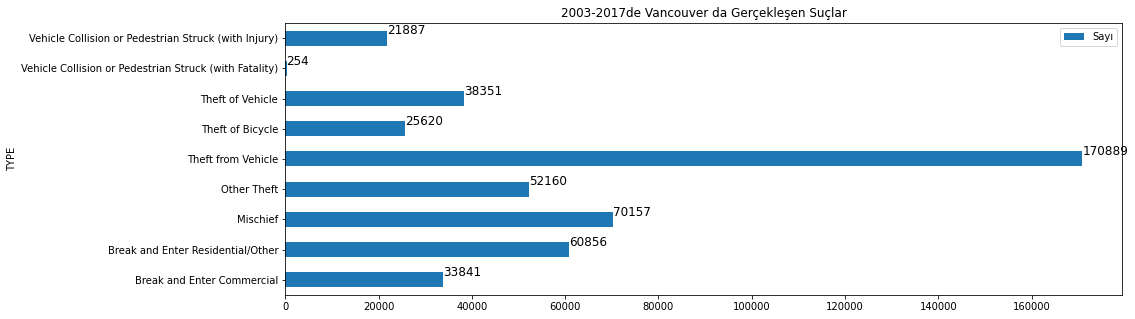

In [7]:
totals = []
ax = plot.plot(kind='barh',figsize=(15,5),title='2003-2017de Vancouver da Gerçekleşen Suçlar')
for i in ax.patches:                                    #Grafik oluşturma
    ax.text(i.get_width()+0.3,i.get_y()+0.38,\
            str(round((i.get_width()),2)),fontsize=12,color='black')

In [8]:
crime_fromvehicle = crime_dropped.loc[crime_dropped["TYPE"]=="Theft from Vehicle"]
crime_fromvehicle_grouped = crime_fromvehicle.groupby(crime_fromvehicle['NEIGHBOURHOOD']).count()
# Suç tipini 'Theft from Vehicle' olarak belirleyip, mahallelerde işlenme sayılarını öğrenmek.

In [9]:
plot = crime_fromvehicle_grouped.iloc[:,0]
plot = pd.DataFrame(plot)   #Grafik oluşturma
plot.columns = ["Sayı"]

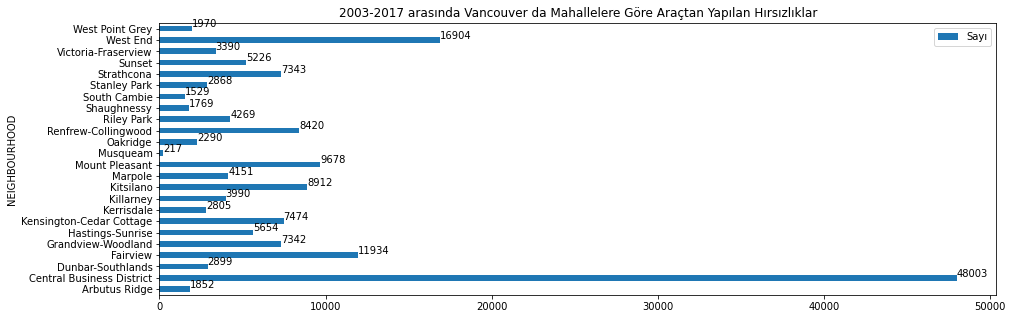

In [10]:

totals = []
ax = plot.plot(kind='barh',figsize=(15,5),title='2003-2017 arasında Vancouver da Mahallelere Göre Araçtan Yapılan Hırsızlıklar')
for i in ax.patches:                            #Grafik oluşturma.
    ax.text(i.get_width()+0.3,i.get_y()+0.38,\
            str(round((i.get_width()),2)),fontsize=10,color='black')

In [11]:
crime_neig = crime_dropped.groupby(crime_dropped["NEIGHBOURHOOD"]).count()
#Mahallelerde işlenmiş tüm suçların sayısını öğrenmek.

In [12]:
plot = crime_neig.iloc[:,0]
plot = pd.DataFrame(plot) # Grafik oluşturma
plot.columns = ["Sayı"]

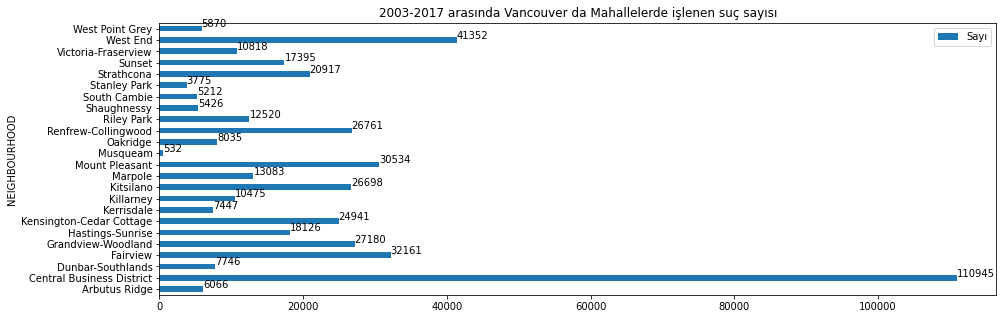

In [13]:
totals = []
ax = plot.plot(kind='barh',figsize=(15,5),title='2003-2017 arasında Vancouver da Mahallelerde işlenen suç sayısı')
for i in ax.patches:                            #Grafik oluşturma
    ax.text(i.get_width()+0.3,i.get_y()+0.38,\
            str(round((i.get_width()),2)),fontsize=10,color='black')

# K-Means Kümeleme

In [14]:
# K-Means için veri setinin şekillendirilmesi.
crime_g = crime_dropped.groupby(['NEIGHBOURHOOD','TYPE']).size().to_frame('count').reset_index()
crime_g = crime_g.pivot(index='NEIGHBOURHOOD', columns='TYPE',values='count')

In [15]:
crime_g.head(20)

TYPE,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
NEIGHBOURHOOD,,,,,,,,,
Arbutus Ridge,325,1672,934,337,1852,160,498,3,285
Central Business District,9371,3505,16671,19243,48003,6907,4016,41,3188
Dunbar-Southlands,294,1847,1324,241,2899,240,629,3,269
Fairview,3303,3834,3196,3269,11934,3394,2037,14,1180
Grandview-Woodland,2082,4515,4970,2508,7342,1403,3111,9,1240
Hastings-Sunrise,929,3199,2904,1379,5654,321,2452,18,1270
Kensington-Cedar Cottage,1277,4136,3760,2961,7474,859,2919,11,1544
Kerrisdale,326,1826,1049,265,2805,179,547,7,443
Killarney,302,2130,1761,245,3990,163,1302,12,570


In [16]:
neighbourhoods = crime_g.index
neighbourhoods = np.array(neighbourhoods) #Mahalleleri indexlerine göre bir arrayde tutmak. KMeans sonuçları için.

In [17]:
scaler = StandardScaler() # Veri setini ortalamasını = 0 standart sapmasını = 1 yaparak normalleştiren araç.

In [18]:
sum_of_squared_distances=[]

std_scale = scaler.fit(crime_g) # Veri setinin ortalamasını = 0 standart sapmasını = 1 yaparak normalleştirilmesi
crime_gtransf = std_scale.transform(crime_g)#normalleştirilen veri setinin dönüştürülmesi
pca = PCA(n_components=3) # PCA tanımı
pca = pca.fit(crime_gtransf) # Dönüştürülen veri setinde PCA uygulanması
X = pca.transform(crime_gtransf)#PCA uygulanmış veri setinin dönüştürülmesi

K=range(1,15)
for k in K:                     # Her K değeri için dirsek yönteminin hesaplanması
    km = KMeans(n_clusters=k)
    km = km.fit(crime_gtransf)
    sum_of_squared_distances.append(km.inertia_)

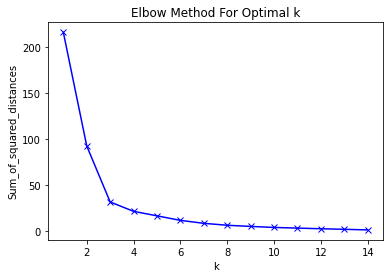

In [19]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Dirsek şekli k=3 te oluşuyor. K-means için en iyi k=3.

n adet kümede = 2 Ortalama silüet skoru = 0.7450740395325385
n adet kümede = 3 Ortalama silüet skoru = 0.5501818086538878
n adet kümede = 4 Ortalama silüet skoru = 0.46022641202915104
n adet kümede = 5 Ortalama silüet skoru = 0.44582433174596847


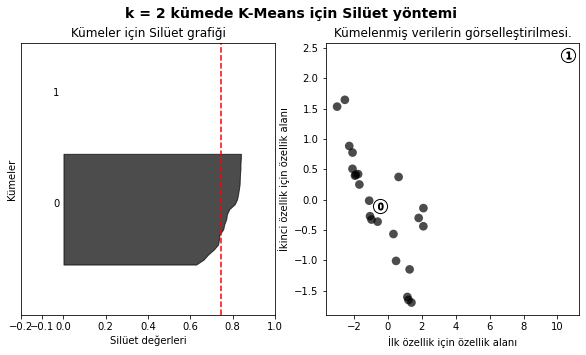

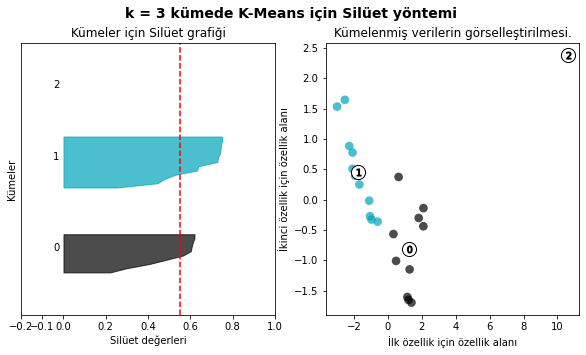

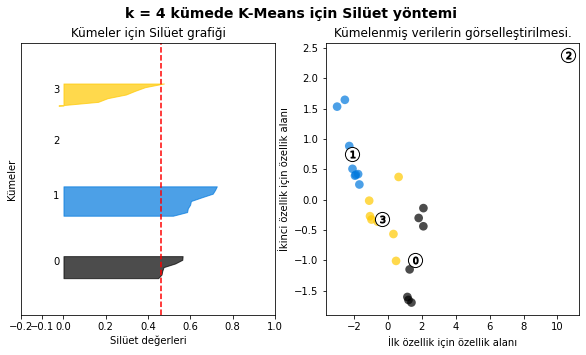

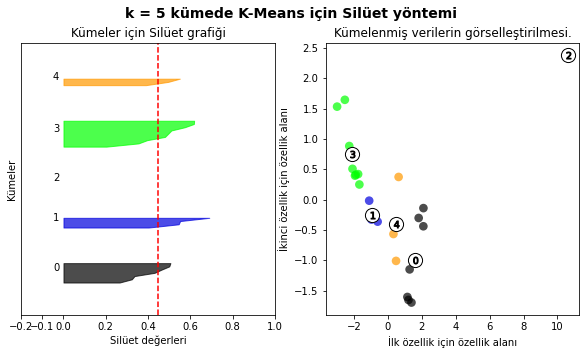

In [20]:
for n_clusters in range(2,6):
    kmeans = KMeans(n_clusters=n_clusters,random_state=3425)
    cluster_labels = kmeans.fit_predict(X)            #k=n kümede silüet skorlarının hesaplanması
    silhoutte_avg = silhouette_score(X,cluster_labels)
    print("n adet kümede =",n_clusters,"Ortalama silüet skoru =",silhoutte_avg)
    sample_silhoutte_values = silhouette_samples(X, cluster_labels)

    fig,(ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(10,5)       

                                                    #grafik oluşturulması
    ax1.set_xlim([0.1,1])
    ax1.set_ylim([0,len(X)+(n_clusters+1)*10])

    y_lower = 10
    for i in range(n_clusters):
        cluster_silhoutte_values = \
            sample_silhoutte_values[cluster_labels==i]
        
        cluster_silhoutte_values.sort()
                                                #grafik oluşturulması
        size_cluster_i = cluster_silhoutte_values.shape[0]
        y_upper = y_lower +size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, cluster_silhoutte_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Kümeler için Silüet grafiği")     #grafik oluşturulması
    ax1.set_xlabel("Silüet değerleri")
    ax1.set_ylabel("Kümeler")

    # Tüm değerler için sileüt skorunu gösteren dikey çizgi
    ax1.axvline(x=silhoutte_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Oluşturulmuş kümelerin grafiğinin oluşturulması
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=300, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Kümelerin etiketleri
    centers = kmeans.cluster_centers_
    # Kümelerin ortalarına beyaz etiket çizmek
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Kümelenmiş verilerin görselleştirilmesi.")
    ax2.set_xlabel("İlk özellik için özellik alanı")
    ax2.set_ylabel("İkinci özellik için özellik alanı")

    plt.suptitle(("k = %d kümede K-Means için Silüet yöntemi" % n_clusters ),
                 fontsize=14, fontweight='bold')

plt.show()

Silüet skorları ve grafikler incelendiğinde:
 - En iyi silüet skoru k=2 fakat grafikler incelendiğinde "1" etiketli kümenin tek bir mahalleden oluştuğu, "0" etiketli diğer mahallelerden oluştuğu görülmekte. "1" etiketli kümede ki mahallenin "Central Business Disctrict" olduğu söylenebilir. Bu durumda bizim için en iyi k=2 olduğu söylenemez.
 - k=3 grafikleri incelendiğinde ise "2" etiketli kümenin tek bir mahalle, "0" ve "1" etiketli kümelerin geri kalan mahallelerden oluştuğu görülüyor. 

Çalışma Zamanı : 0.016991690999930142


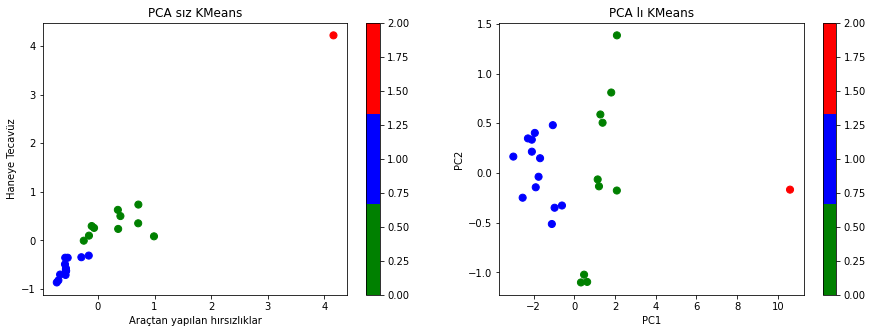

In [21]:
kmeans = KMeans(n_clusters=3,random_state=3425) # k=3 KMeans
colors = ['green','blue','red']

plt.figure(figsize=(15,5))

ax=plt.subplot(121)
kc = kmeans.fit(crime_gtransf) #PCAsız KMeans işlemi
label = pd.DataFrame(kc.labels_) #Kümelerin etiketlenmesi
crime_result = pd.DataFrame(crime_gtransf) # Sonuçlar
crime_result['label']=label

scatter = plt.scatter(crime_result[0],crime_result[2],c=list(label.iloc[:,0]),cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title("PCA sız KMeans")
plt.xlabel("Araçtan yapılan hırsızlıklar") #Grafik oluşuturulması
plt.ylabel("Haneye Tecavüz")
plt.colorbar(scatter)

ax = plt.subplot(122)
start = timeit.default_timer()
kc = kmeans.fit(X) #PCA uygulanmış veri setine KMeans uygulanması
stop = timeit.default_timer()
klabel = pd.DataFrame(kc.labels_)#Kümelerin etiketlenmesi
crime_result = pd.DataFrame(X)#Sonuçlar
crime_result['label'] = klabel
scatter = plt.scatter(crime_result[0],crime_result[2],c=list(klabel.iloc[:,0]),cmap=matplotlib.colors.ListedColormap(colors),s=50)

plt.title("PCA lı KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")     #Grafik oluşuturlması
plt.colorbar(scatter)
print("Çalışma Zamanı :",stop-start)
plt.show()


PCA uygulanmamış KMeans sonuçları incelendiğinde bazı noktaların birbirine çok yakın olduğu gözlemleniyor. Bu durum kafa karışıklığına sebebiyet vermemesi adına Boyut azaltma tekniği olan PCA uygulanabilir. PCA uygulanmış KMeans sonuçları incelendiğinde noktaların daha farklı düzeylerde olduğu gözlemlenir.

In [22]:

violent = neighbourhoods[np.where(klabel[0] ==1)]
violent2 = neighbourhoods[np.where(klabel[0] == 0)]
violent3 = neighbourhoods[np.where(klabel[0] == 2)]

print(violent) # Güvenli
print(violent2) # Güvensiz
print(violent3) # Central Business District

['Arbutus Ridge' 'Dunbar-Southlands' 'Kerrisdale' 'Killarney' 'Marpole'
 'Musqueam' 'Oakridge' 'Riley Park' 'Shaughnessy' 'South Cambie'
 'Stanley Park' 'Victoria-Fraserview' 'West Point Grey']
['Fairview' 'Grandview-Woodland' 'Hastings-Sunrise'
 'Kensington-Cedar Cottage' 'Kitsilano' 'Mount Pleasant'
 'Renfrew-Collingwood' 'Strathcona' 'Sunset' 'West End']
['Central Business District']


## **Naive Bayes**

In [37]:
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [38]:
train = pd.read_csv('train1.csv')
train.head()

,Unnamed: 0,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,split
0,0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,-0.442091
1,2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,0.555076
2,3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2.888993
3,4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,-1.048279
4,5,Other Theft,2003,3,26,20.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,3.412966


In [39]:
test = pd.read_csv('2022randomtest.csv')
#test = test.drop(columns='TYPE')
test.head()


,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,2022,5,2,18.0,25.0,10XX CAMBIE ST,Central Business District,490670.45,5458416.73
1,2022,8,5,13.0,12.0,10XX CARDERO ST,West End,490148.05,5459395.79
2,2022,12,10,17.0,30.0,40XX W 8TH AVE,West Point Grey,485741.68,5456968.98
3,2022,4,13,23.0,45.0,41XX ALEXANDRA ST,Shaughnessy,489706.90,5455180.78
4,2022,3,21,10.0,15.0,41XX DUNBAR ST,Dunbar-Southlands,486526.33,5455189.95


In [40]:
le = preprocessing.LabelEncoder()
cat = le.fit_transform(train['TYPE']) #Suç tiplerini sayısal değere dönüştürme.

In [41]:
neighs = pd.get_dummies(train['NEIGHBOURHOOD'])#Mahalleleri sayısal değere dönüştürme.
hours = pd.get_dummies(train['HOUR'])#Saatleri sayısal değere dönüştürme.

In [42]:
enc_train = pd.concat([hours,neighs], axis=1)
enc_train['TYPE'] = cat      # farklı bir train veri seti için arraylerin birleştirilmesi

In [43]:
enc_train['X'] = train['X']
enc_train['Y'] = train['Y']

In [44]:
neighs = pd.get_dummies(test['NEIGHBOURHOOD'])#Mahalleleri sayısal değere dönüştürme
hours = pd.get_dummies(test['HOUR'])#Saatleri sayısal değere dönüştürme.

In [45]:
enc_test = pd.concat([hours,neighs], axis=1)#Farklı bir test veri seti için arraylerin birleştirilmesi

In [46]:
enc_test['X'] = test['X']
enc_test['Y'] = test['Y']

In [47]:
training, validation = train_test_split(enc_train,train_size=0.60)
#train veri setini train ve test olarak ikiye ayırmak.

In [48]:
# Model için özelliklerin belirtilmesi
features = ['West Point Grey', 'West End', 'Victoria-Fraserview', 'Sunset','Strathcona',
'Stanley Park', 'South Cambie', 'Shaughnessy', 'Riley Park', 'Renfrew-Collingwood', 
'Oakridge','Musqueam','Mount Pleasant','Marpole','Kitsilano','Killarney','Kerrisdale',
'Kensington-Cedar Cottage','Hastings-Sunrise','Grandview-Woodland','Fairview',
'Dunbar-Southlands','Central Business District','Arbutus Ridge','X','Y']
features.extend(x for x in range (1,24)) # Saatlerin eklenmesi

In [49]:
model = BernoulliNB() #Naive Bayes
model.fit(training[features],training['TYPE']) #Asıl training veri setinden tahmin
predicted = np.array(model.predict_proba(validation[features]))#Sonuçlar
log_loss(validation['TYPE'],predicted)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


1.7259139213452315

In [51]:


model = LogisticRegression(C=0.01) # Lojistik regresyon
model.fit(training[features],training['TYPE']) #Asıl training veri setinden tahmin
predicted = np.array(model.predict_proba(validation[features]))#Sonuçlar
log_loss(validation['TYPE'],predicted)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


1.851329729056224

In [52]:
model = BernoulliNB() # Naive Bayes
model.fit(enc_train[features],enc_train['TYPE']) # Sonradan oluşturulan train veri setinden tahmin
predicted = model.predict_proba(enc_test[features])#Sonuçlar

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [53]:
res = pd.DataFrame(predicted,columns=le.classes_)
res.to_csv("results.csv",index=True,index_label="id")
res.head(20)

,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
0,0.076481,0.018696,0.118718,0.181809,0.490496,0.061750,0.030880,0.000179,0.020990
1,0.023526,0.096642,0.097294,0.281968,0.340228,0.084951,0.041375,0.000162,0.033855
2,0.049061,0.188636,0.131468,0.061481,0.353072,0.074402,0.073323,0.000761,0.067794
3,0.026167,0.267401,0.136467,0.001013,0.385764,0.019301,0.100809,0.001324,0.061753
4,0.021905,0.359258,0.147643,0.038274,0.298347,0.030341,0.057567,0.000792,0.045873
5,0.033626,0.140890,0.135969,0.122017,0.336472,0.034698,0.147798,0.000326,0.048204
6,0.031135,0.183493,0.144722,0.019977,0.450948,0.022013,0.107831,0.000535,0.039347
7,0.059907,0.174927,0.122766,0.081903,0.295315,0.118234,0.072520,0.000715,0.073713
8,0.325719,0.172187,0.214752,0.016220,0.155872,0.021346,0.064521,0.000596,0.028788
9,0.124105,0.148870,0.314771,0.000929,0.255127,0.009341,0.056231,0.013117,0.077508
